# EE 399
### Ting Jones
### 4/17/23
### HW 2



In [1]:
# github page: https://github.com/tingjones
# HW 2 repo: https://github.com/tingjones/ee399_hw2

In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 

## Problem A

In [3]:
# load data, and save images into X
results=loadmat('yalefaces.mat')
X=results['X']

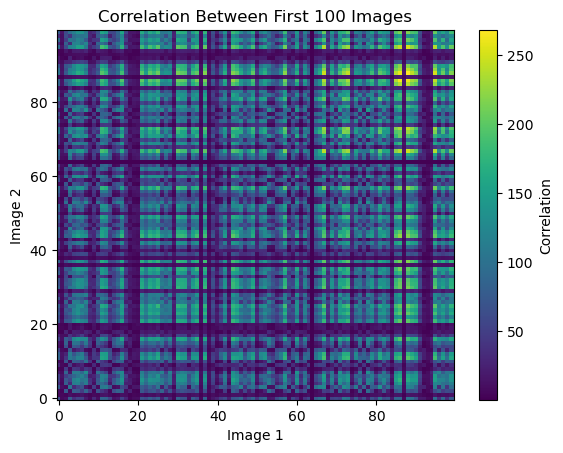

In [4]:
#  get first 100 images
hundr = X[:, :100]
C = np.ndarray((100, 100))

# correlation matrix C, dot product between first 100 images
C = np.matmul(hundr.T, hundr)

fig, ax = plt.subplots()

ab = ax.pcolor(range(0, 100), range(0, 100), C, vmin = np.min(C), vmax=np.max(C))
ax.set_title("Correlation Between First 100 Images")
ax.set_xlabel("Image 1")
ax.set_ylabel("Image 2")
fig.colorbar(ab, ax=ax, label="Correlation")

## Problem B

In [5]:
# get the most correlated images
most = np.argwhere(C == np.max(C))

# get the least correlated images
least = np.argwhere(C == np.min(C))

print(most, least) # first image and second image

# notice that images are the same, repeat process
# but with the next greatest/least correlation when indices are different
most = np.argwhere(C == np.sort(C.flatten())[-3])[0]
least = np.argwhere(C == np.sort(C.flatten())[1])[0]
print(most, least)

[[88 88]] [[64 64]]
[86 88] [54 64]


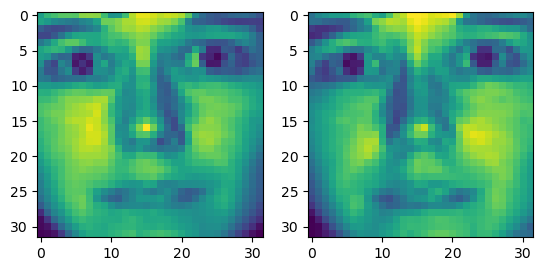

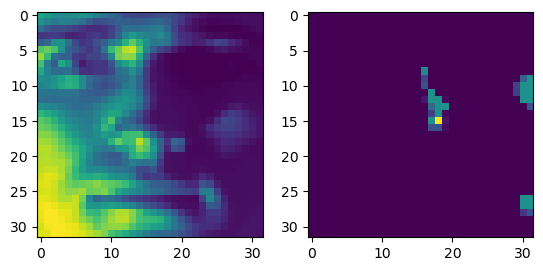

In [6]:
fig = plt.figure()
ax1 = plt.subplot(121)
ax1.imshow(X[:,86].reshape((32, 32), order='F').T)
ax2 = plt.subplot(122)
ax2.imshow(X[:,88].reshape((32, 32), order='F').T)


fig = plt.figure()
ax1 = plt.subplot(121)
ax1.imshow(X[:,54].reshape((32, 32), order='F').T)
ax2 = plt.subplot(122)
ax2.imshow(X[:,64].reshape((32, 32), order='F').T)

## Problem C

In [7]:
img_list = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]
get_img = X[:, np.subtract(img_list, 1)]

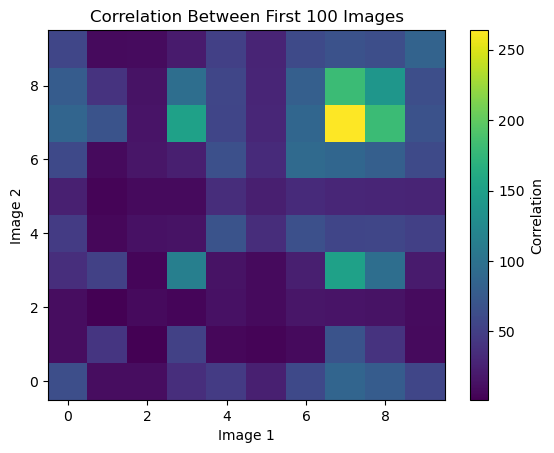

In [8]:
C = np.ndarray((10, 10))
C = np.matmul(get_img.T, get_img)

fig, ax = plt.subplots()

ab = ax.pcolor(range(0, 10), range(0, 10), C, vmin = np.min(C), vmax=np.max(C))
ax.set_title("Correlation Between First 100 Images")
ax.set_xlabel("Image 1")
ax.set_ylabel("Image 2")
fig.colorbar(ab, ax=ax, label="Correlation")

[7 7] [1 2]


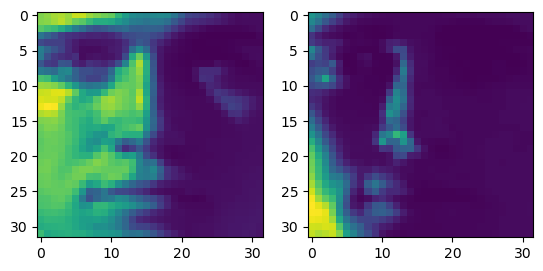

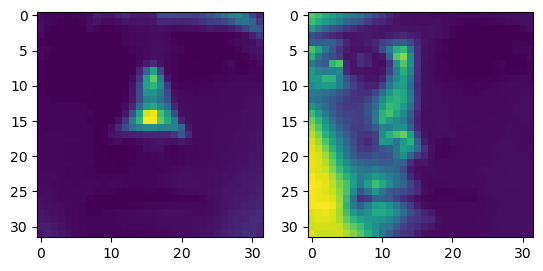

In [9]:
# get the most correlated images
most = np.argwhere(C == np.max(C))[0]

# get the least correlated images
least = np.argwhere(C == np.min(C))[0]

print(most, least) # first image and second image

fig = plt.figure()
ax1 = plt.subplot(121)
ax1.imshow(X[:,7].reshape((32, 32), order='F').T)
ax2 = plt.subplot(122)
ax2.imshow(X[:,8].reshape((32, 32), order='F').T)


fig = plt.figure()
ax1 = plt.subplot(121)
ax1.imshow(X[:,1].reshape((32, 32), order='F').T)
ax2 = plt.subplot(122)
ax2.imshow(X[:,2].reshape((32, 32), order='F').T)

## Problem D

In [10]:
import scipy
from scipy.sparse.linalg import eigs

In [11]:
Y = np.matmul(X, X.T)

# eigenvalues stored in w, eigenvectors stored in v
w, vec = scipy.sparse.linalg.eigs(Y, 6, which="LM")
print(vec, vec.shape)

[[-0.02384327+0.j  0.04535378+0.j  0.05653196+0.j -0.04441826+0.j
  -0.03378603+0.j  0.02207542+0.j]
 [-0.02576146+0.j  0.04567536+0.j  0.04709124+0.j -0.05057969+0.j
  -0.01791442+0.j  0.03378819+0.j]
 [-0.02728448+0.j  0.04474528+0.j  0.0362807 +0.j -0.05522219+0.j
  -0.00462854+0.j  0.04487476+0.j]
 ...
 [-0.02082937+0.j -0.03737158+0.j  0.06455006+0.j  0.01006919+0.j
   0.06172201+0.j  0.03025485+0.j]
 [-0.0193902 +0.j -0.03557383+0.j  0.06196898+0.j  0.00355905+0.j
   0.05796353+0.j  0.02850199+0.j]
 [-0.0166019 +0.j -0.02965746+0.j  0.05241684+0.j -0.00040934+0.j
   0.05757412+0.j  0.00941028+0.j]] (1024, 6)


## Problem E

In [33]:
# U are eigenvectors of AA^H, V are eigenvectors of A^H A
# S = np.diag(s), eigenvalues are s**2
u, s, v= np.linalg.svd(X)
dir = u[:, :6]
print(dir, dir.shape)

[[-0.02384327  0.04535378  0.05653196 -0.04441826  0.03378603 -0.02207542]
 [-0.02576146  0.04567536  0.04709124 -0.05057969  0.01791442 -0.03378819]
 [-0.02728448  0.04474528  0.0362807  -0.05522219  0.00462854 -0.04487476]
 ...
 [-0.02082937 -0.03737158  0.06455006  0.01006919 -0.06172201 -0.03025485]
 [-0.0193902  -0.03557383  0.06196898  0.00355905 -0.05796353 -0.02850199]
 [-0.0166019  -0.02965746  0.05241684 -0.00040934 -0.05757412 -0.00941028]] (1024, 6)


## Problem F

In [26]:
v1 = vec[:, 0]
u1 = dir[:, 0]

print(v1)
print(u1)

[-0.02384327+0.j -0.02576146+0.j -0.02728448+0.j ... -0.02082937+0.j
 -0.0193902 +0.j -0.0166019 +0.j]
[ 1.27829270e-03  1.27356403e-05  1.75989843e-03 ...  1.40744989e-02
 -1.43745600e-03 -3.20845460e-03]


In [34]:
norm = np.linalg.norm(np.abs(v1) - np.abs(u1))
print(norm)

0.9325819381051791


## Problem G

In [38]:
test = np.array([[1,2,3], [4,5,6]])
print(np.sum(test, 0))

print(np.sum(test, 1))


[5 7 9]
[ 6 15]


In [51]:
# proportion of the variation is the eigenvalue divided by the sum of the eigenvalues
# eigenvalues are found with s**2

eigval = np.square(s[:6])
prop_var = eigval/np.sum(eigval) * 100
print(prop_var)

[77.67727064 16.27704934  2.7339146   1.99980626  0.68094323  0.63101594]


(1024,)
[483.75660704 221.44596474  90.75538495  77.62004546  45.29344801]
(2414, 2414)
2911.7325608052224


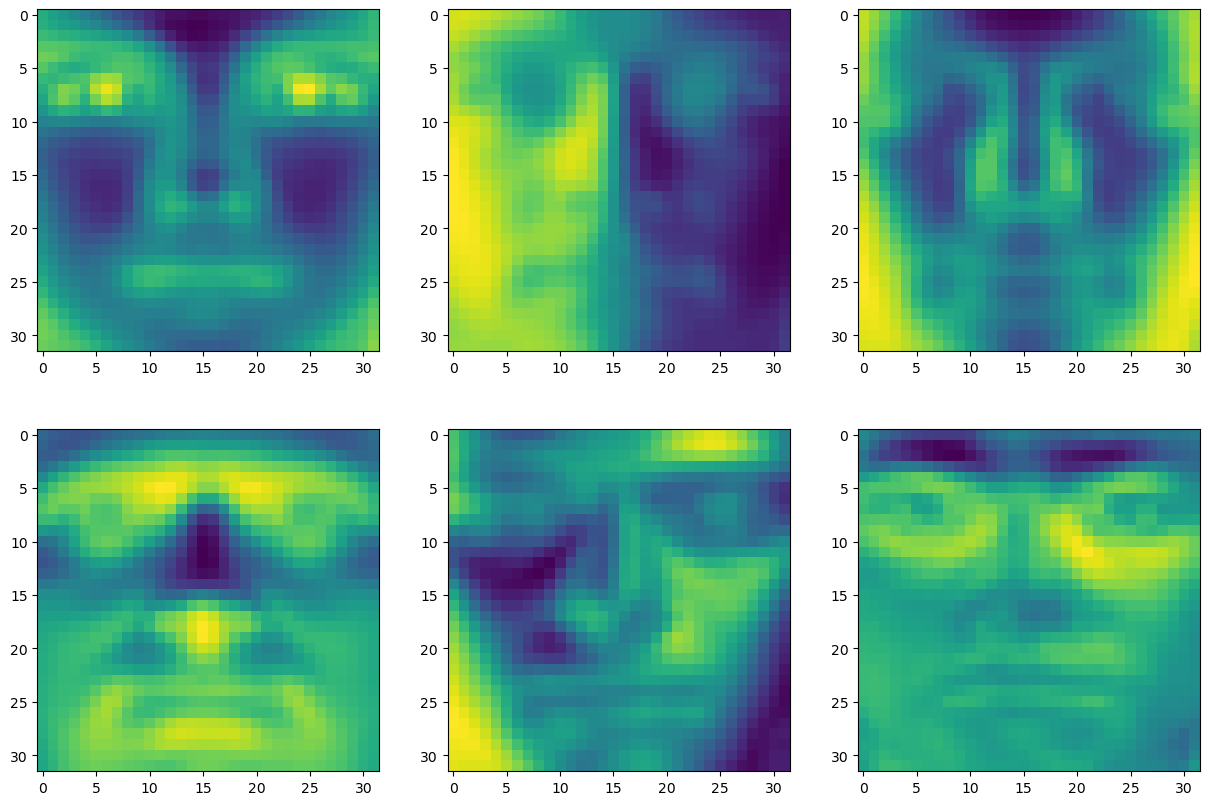

In [52]:
fig = plt.figure(figsize=(15, 10))
for k in range(6):
    mode = dir[:, k].reshape((32, 32), order='F').T
    ax = fig.add_subplot(2, 3, k+1)
    ax.imshow(mode)

print(s.shape)
print(s[0:5])
print(v.shape)
print(np.sum(s))